In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../data/train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.drop(columns=['MiscFeature',
                   'Fence',
                   'PoolQC',
                   'FireplaceQu',
                   'Alley'], inplace=True)

In [5]:
data.set_index('Id', inplace=True)

In [6]:
num_data = data.select_dtypes('number')

In [7]:
num_cols = list(num_data.columns)

In [8]:
num_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
num_data.drop('SalePrice', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
c = 0
for i in num_data.columns:
    if i.startswith("Sale"):
        print('aqui')
    c += 1
    if c == len(num_data.columns):
        print('Ok')

Ok


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [12]:
imp = SimpleImputer(strategy='mean')

num_data = imp.fit_transform(num_data)

std = StandardScaler()

num_data = std.fit_transform(num_data)

In [13]:
num_data

array([[ 0.07337496, -0.22937175, -0.20714171, ..., -0.08768781,
        -1.5991111 ,  0.13877749],
       [-0.87256276,  0.4519361 , -0.09188637, ..., -0.08768781,
        -0.48911005, -0.61443862],
       [ 0.07337496, -0.09311018,  0.07347998, ..., -0.08768781,
         0.99089135,  0.13877749],
       ...,
       [ 0.30985939, -0.18395123, -0.14781027, ...,  4.95311151,
        -0.48911005,  1.64520971],
       [-0.87256276, -0.09311018, -0.08016039, ..., -0.08768781,
        -0.8591104 ,  1.64520971],
       [-0.87256276,  0.22483348, -0.05811155, ..., -0.08768781,
        -0.1191097 ,  0.13877749]])

In [14]:
num_cols.pop()

'SalePrice'

In [15]:
df = pd.DataFrame(num_data, columns=num_cols)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
data.SalePrice

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [18]:
X = num_data.copy()
y = data.SalePrice

In [20]:
X.shape

(1460, 36)

In [21]:
y.shape

(1460,)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
reg = LinearRegression()

In [24]:
reg.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred = reg.predict(X_test)

In [26]:
y_pred

array([151454.9427593 , 308704.9427593 , 114848.9427593 , 181168.9427593 ,
       299376.9427593 ,  46752.9427593 , 230248.9427593 , 150192.9427593 ,
        45136.9427593 , 149984.9427593 , 154768.9427593 , 115856.9427593 ,
        76504.9427593 , 212400.9427593 , 190464.9427593 , 142196.9427593 ,
       213584.9427593 , 136246.9427593 , 116604.9427593 , 233872.9427593 ,
       185592.9427593 , 212192.9427593 , 192496.9427593 , 132432.9427593 ,
       211736.9427593 , 147828.9427593 , 199112.9427593 ,  81384.9427593 ,
       180712.9427593 , 179576.9427593 , 115816.9427593 , 273040.9427593 ,
       225056.9427593 ,  85708.9427593 , 268080.9427593 , 158912.1927593 ,
       149308.9427593 , 218184.9427593 , 303464.9427593 ,  91488.9427593 ,
       138300.9427593 , 250940.9427593 , 106080.9427593 , 270592.9427593 ,
       130896.9427593 , 126484.6927593 , 105632.9427593 , 127900.9427593 ,
       357232.9427593 , 128232.9427593 , 105752.9427593 , 216160.9427593 ,
        85728.9427593 , 3

In [37]:
feature_importance = list(zip(num_cols,reg.coef_))

In [38]:
feature_importance

[('MSSubClass', -9703.29969423193),
 ('LotFrontage', -2693.207049356529),
 ('LotArea', 4377.776204514865),
 ('OverallQual', 25460.895609755204),
 ('OverallCond', 3660.1380785770903),
 ('YearBuilt', 7836.775249284998),
 ('YearRemodAdd', 3615.4213587665145),
 ('MasVnrArea', 3871.807153622106),
 ('BsmtFinSF1', 2.22807822369773e+16),
 ('BsmtFinSF2', 7880584593989884.0),
 ('BsmtUnfSF', 2.1585579081098668e+16),
 ('TotalBsmtSF', -2.1431130708001028e+16),
 ('1stFlrSF', 5.687237050291894e+16),
 ('2ndFlrSF', 6.421933366687736e+16),
 ('LowQualFinSF', 7153123677158445.0),
 ('GrLivArea', -7.730538792949589e+16),
 ('BsmtFullBath', 6358.949389488988),
 ('BsmtHalfBath', -65.35055624594591),
 ('FullBath', 2239.0938821415966),
 ('HalfBath', -949.6722599880698),
 ('BedroomAbvGr', -7554.987417666856),
 ('KitchenAbvGr', -1808.2729799958713),
 ('TotRmsAbvGrd', 8690.993620090074),
 ('Fireplaces', 3397.702978792199),
 ('GarageYrBlt', 2839.894578899),
 ('GarageCars', 11477.313771753154),
 ('GarageArea', -2162.

In [39]:
feature_importance.sort()

In [40]:
feature_importance

[('1stFlrSF', 5.687237050291894e+16),
 ('2ndFlrSF', 6.421933366687736e+16),
 ('3SsnPorch', 1391.9398457479167),
 ('BedroomAbvGr', -7554.987417666856),
 ('BsmtFinSF1', 2.22807822369773e+16),
 ('BsmtFinSF2', 7880584593989884.0),
 ('BsmtFullBath', 6358.949389488988),
 ('BsmtHalfBath', -65.35055624594591),
 ('BsmtUnfSF', 2.1585579081098668e+16),
 ('EnclosedPorch', 188.3130372592707),
 ('Fireplaces', 3397.702978792199),
 ('FullBath', 2239.0938821415966),
 ('GarageArea', -2162.2346820436196),
 ('GarageCars', 11477.313771753154),
 ('GarageYrBlt', 2839.894578899),
 ('GrLivArea', -7.730538792949589e+16),
 ('HalfBath', -949.6722599880698),
 ('KitchenAbvGr', -1808.2729799958713),
 ('LotArea', 4377.776204514865),
 ('LotFrontage', -2693.207049356529),
 ('LowQualFinSF', 7153123677158445.0),
 ('MSSubClass', -9703.29969423193),
 ('MasVnrArea', 3871.807153622106),
 ('MiscVal', -1126.9693503146352),
 ('MoSold', 61.160710165643415),
 ('OpenPorchSF', -1281.5970264196571),
 ('OverallCond', 3660.13807857709

In [41]:
first_important = '1stFlrSF'

In [44]:
d_teste = pd.DataFrame(X_test, columns=num_cols)

In [45]:
d_teste[first_important]

0     -0.244858
1      0.872994
2     -0.348363
3     -0.410466
4      1.183509
         ...   
433   -0.275910
434    0.000966
435   -0.881413
436   -1.238505
437    2.078826
Name: 1stFlrSF, Length: 438, dtype: float64

In [92]:
d_teste.loc[:4, first_important].sort_values()

3   -0.410466
2   -0.348363
0   -0.244858
1    0.872994
4    1.183509
Name: 1stFlrSF, dtype: float64

In [139]:
df_final.columns

Index(['coluna_x', 'y_pred', 'SalePrice'], dtype='object')

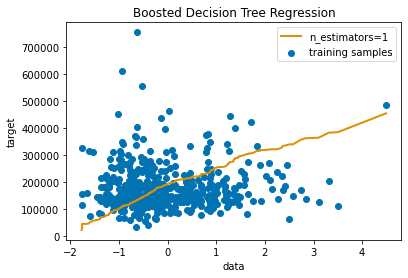

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(df_final.coluna_x.sort_values(), df_final.SalePrice.sort_index(), color=colors[0], label="training samples")
plt.plot(df_final.coluna_x.sort_values(), df_final.y_pred.sort_values(), color=colors[1], label="n_estimators=1", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [65]:
d_train = pd.DataFrame(X_train, columns=num_cols)

In [72]:
d_train['2ndFlrSF'].mode()

0   -0.795163
dtype: float64

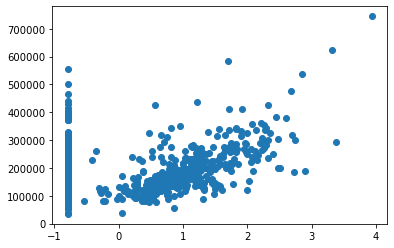

In [70]:
plt.scatter(d_train['2ndFlrSF'], y_train)

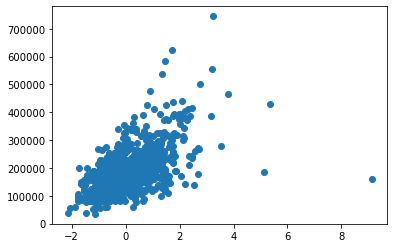

In [67]:
plt.scatter(d_train[first_important], y_train)

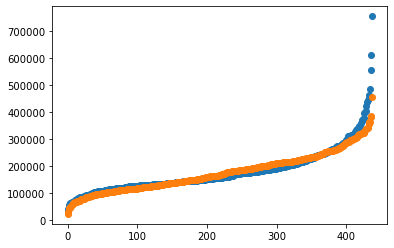

In [79]:
plt.scatter(x=range(len(y_test)), y=y_test.sort_values())
plt.scatter(x=range(len(y_pred)), y=pd.Series(y_pred).sort_values())

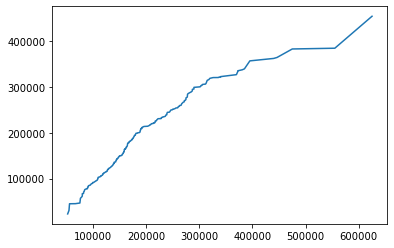

In [346]:
plt.plot(y_test.sort_values(), y_pred.sort_values())

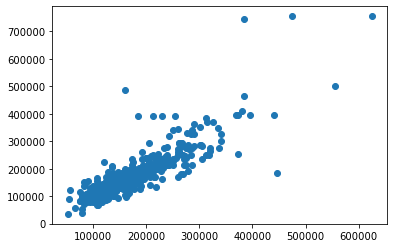

In [348]:
plt.scatter(y_test, y_pred_tree)

In [94]:
d = pd.DataFrame()
d[first_important] = d_teste[first_important]

In [96]:
d['y_test'] = y_test
d['y_pred'] = y_pred

In [98]:
y_test

Id
893     154500
1106    325000
414     115000
523     159000
1037    315500
         ...  
332     139000
324     126175
651     205950
440     110000
799     485000
Name: SalePrice, Length: 438, dtype: int64

In [108]:
d.drop('y_test', axis=1, inplace=True)

In [110]:
d['y'] = pd.Series(y_test)

In [119]:
y_pred = pd.Series(y_pred)

In [120]:
y_pred

0      151454.942759
1      308704.942759
2      114848.942759
3      181168.942759
4      299376.942759
           ...      
433    132078.942759
434    105514.942759
435    210168.942759
436    150562.165009
437    364667.535524
Length: 438, dtype: float64

In [127]:
a = pd.DataFrame({'coluna_x': d_teste[first_important],
              'y_pred': y_pred})

In [131]:
b = pd.DataFrame(data=y_test)

In [132]:
a.reset_index(drop=True, inplace=True)
b.reset_index(drop=True, inplace=True)

In [134]:
a

,coluna_x,y_pred
0,-0.244858,151454.942759
1,0.872994,308704.942759
2,-0.348363,114848.942759
3,-0.410466,181168.942759
4,1.183509,299376.942759
...,...,...
433,-0.275910,132078.942759
434,0.000966,105514.942759
435,-0.881413,210168.942759
436,-1.238505,150562.165009


In [157]:
c = sns.color_palette("pastel")

In [158]:
c

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [138]:
df_final = pd.concat([a, b], axis=1)

In [118]:
y_test

Id
893     154500
1106    325000
414     115000
523     159000
1037    315500
         ...  
332     139000
324     126175
651     205950
440     110000
799     485000
Name: SalePrice, Length: 438, dtype: int64

In [83]:
d_teste[first_important][:10]

0   -0.244858
1    0.872994
2   -0.348363
3   -0.410466
4    1.183509
5   -1.378236
6   -0.066312
7   -0.796021
8   -1.378236
9   -0.752032
Name: 1stFlrSF, dtype: float64

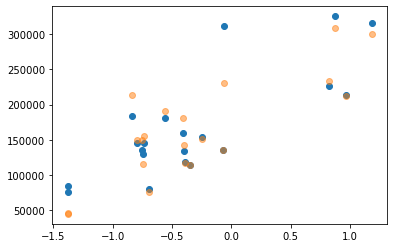

In [89]:
plt.scatter(x=d_teste[first_important][:20], y=y_test[:20], )
plt.scatter(x=d_teste[first_important][:20], y=pd.Series(y_pred[:20]), alpha=0.5)

In [78]:
pd.Series(y_pred)

0      151454.942759
1      308704.942759
2      114848.942759
3      181168.942759
4      299376.942759
           ...      
433    132078.942759
434    105514.942759
435    210168.942759
436    150562.165009
437    364667.535524
Length: 438, dtype: float64

In [69]:
d_train[first_important].describe()

count    1022.000000
mean        0.018401
std         1.008009
min        -2.144172
25%        -0.706102
50%        -0.171111
75%         0.593531
max         9.132681
Name: 1stFlrSF, dtype: float64

In [ ]:
plt.figure()
plt.scatter(d_teste.loc[:4, first_important], y_test[:5], color=colors[0], label="training samples")
plt.plot(d_teste.loc[:4, first_important], y_pred[:5], color=colors[1], label="n_estimators=1", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [53]:
len(y_test[:10])

10

In [54]:
len(y_pred[:10])

10

In [60]:
len(d_teste.loc[:10, first_important]) == len(y_test[:10])

False

In [62]:
len(d_teste.loc[:9, first_important])

10

In [141]:
d_teste

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.872563,-0.002269,-0.210750,-0.071836,2.179628,-0.273836,0.878668,-0.574410,0.481115,-0.288653,...,-0.977769,0.780197,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
1,0.073375,1.269506,0.174303,1.374795,-0.517200,0.752907,0.491040,1.431049,1.290428,-0.288653,...,1.118318,0.732311,-0.221343,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210
2,-0.636078,-0.638156,-0.156028,-0.795151,0.381743,-1.466183,-1.689368,-0.574410,-0.973018,-0.288653,...,-0.528608,-0.752176,-0.704483,1.768397,-0.116339,-0.270208,-0.068692,-0.087688,-1.229111,1.645210
3,-0.163109,-0.910680,-0.552908,-0.071836,1.280685,-0.803768,-1.689368,-0.574410,-0.097907,-0.288653,...,-0.247882,-0.752176,-0.342128,0.229890,-0.116339,-0.270208,-0.068692,-0.087688,1.360892,-1.367655
4,-0.872563,0.860721,0.238646,2.098110,-0.517200,1.183477,1.120936,-0.186614,1.268496,-0.288653,...,2.054071,1.067517,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.891994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,-0.872563,-0.002269,-0.234603,-0.795151,0.381743,-0.439440,0.345679,-0.574410,0.882482,-0.288653,...,-0.771903,-0.752176,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439
434,-0.872563,-0.956100,-0.470726,-2.241782,2.179628,-0.538802,0.975575,-0.574410,-0.411543,-0.288653,...,-1.183635,0.381142,0.775134,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.250891,-1.367655
435,0.073375,-0.229372,-0.239714,0.651479,0.381743,1.183477,1.072482,0.000000,-0.973018,-0.288653,...,0.416503,-0.752176,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,0.138777
436,-0.163109,-0.138531,0.184125,-0.071836,2.179628,-1.698028,0.733308,-0.574410,-0.973018,-0.288653,...,0.257425,-0.752176,-0.009969,-0.359325,-0.116339,-0.270208,-0.068692,1.525368,0.620891,0.891994


In [142]:
df_final

,coluna_x,y_pred,SalePrice
0,-0.244858,151454.942759,154500
1,0.872994,308704.942759,325000
2,-0.348363,114848.942759,115000
3,-0.410466,181168.942759,159000
4,1.183509,299376.942759,315500
...,...,...,...
433,-0.275910,132078.942759,139000
434,0.000966,105514.942759,126175
435,-0.881413,210168.942759,205950
436,-1.238505,150562.165009,110000


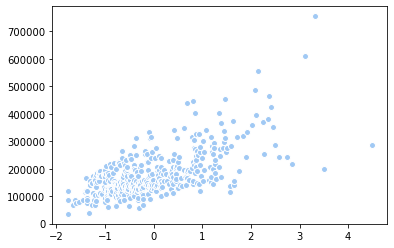

In [163]:
plt.scatter(
    df_final['coluna_x'],
    df_final.SalePrice, color=c[0], edgecolors='white')

In [147]:
df_final = df_final.sort_values(by='coluna_x')

In [155]:
colors

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [164]:
# treinando com uma random forst

In [165]:
from sklearn.tree import DecisionTreeRegressor

In [166]:
tree = DecisionTreeRegressor()

In [208]:
X = pd.DataFrame(num_data, columns=num_cols)

In [209]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,-0.288653,...,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439
1456,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,0.722112,...,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210
1457,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,-0.288653,...,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210
1458,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,6.092188,...,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210


In [212]:
data.reset_index(drop=True, inplace=True)

In [214]:
y = data.SalePrice

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [216]:
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [217]:
y_pred_tree = tree.predict(X_test)

In [218]:
y_pred_tree.shape

(438,)

In [219]:
y_test.shape

(438,)

In [223]:
X_test.iloc[:,12]

1174    0.019079
554    -0.405291
5      -0.948691
868     0.994612
959    -1.207453
          ...   
1120   -0.389765
831    -1.662875
525     0.267491
355     0.096708
535    -0.886588
Name: 1stFlrSF, Length: 438, dtype: float64

In [170]:
y_test

Id
893     154500
1106    325000
414     115000
523     159000
1037    315500
         ...  
332     139000
324     126175
651     205950
440     110000
799     485000
Name: SalePrice, Length: 438, dtype: int64

In [224]:
tree_importance = tree.feature_importances_

In [225]:
tree_importance = list(zip(num_cols, tree_importance))

In [226]:
sorted(tree_importance)

[('1stFlrSF', 0.005352749220760212),
 ('2ndFlrSF', 0.012286409897027043),
 ('3SsnPorch', 0.00018713692727557538),
 ('BedroomAbvGr', 0.001854459353642678),
 ('BsmtFinSF1', 0.03109584953645906),
 ('BsmtFinSF2', 0.0008301871823701907),
 ('BsmtFullBath', 0.0039881418544178236),
 ('BsmtHalfBath', 3.91720517106256e-05),
 ('BsmtUnfSF', 0.006599477317601924),
 ('EnclosedPorch', 0.0012765012769559926),
 ('Fireplaces', 0.003397144216271678),
 ('FullBath', 0.0018453884662701422),
 ('GarageArea', 0.017783350901879137),
 ('GarageCars', 0.012877082228679998),
 ('GarageYrBlt', 0.004596164375495548),
 ('GrLivArea', 0.11428200161622083),
 ('HalfBath', 0.00038375913916672226),
 ('KitchenAbvGr', 0.005520361922867518),
 ('LotArea', 0.014608949106026867),
 ('LotFrontage', 0.001433328887038416),
 ('LowQualFinSF', 0.0004915316928079328),
 ('MSSubClass', 0.00043207174457032897),
 ('MasVnrArea', 0.003344396693831038),
 ('MiscVal', 3.5166290970724238e-06),
 ('MoSold', 0.0013007898681140332),
 ('OpenPorchSF', 0.

In [227]:
df_a = pd.DataFrame()

In [228]:
df_a[first_important] = X_test.iloc[:,12]

In [230]:
df_a.reset_index(drop=True, inplace=True)

In [244]:
df_a['y_test'] = np.array(y_test)

In [246]:
df_a['y_pred_tree'] = np.array(y_pred_tree)

In [248]:
df_a = df_a.sort_values(first_important)

In [250]:
c

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [270]:
i = 30

n = 100

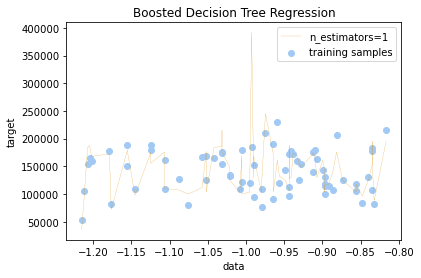

In [272]:
plt.figure()
plt.scatter(df_a['1stFlrSF'][i:n], df_a.y_test[i:n], color=c[0], label="training samples")
plt.plot(df_a['1stFlrSF'][i:n], df_a.y_pred_tree[i:n], color=colors[1], label="n_estimators=1", linewidth=0.2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [273]:
from sklearn.decomposition import PCA

In [275]:
pca = PCA(n_components=1)

In [277]:
x_train = pca.fit_transform(X_train)

In [278]:
x_test = pca.transform(X_test)

In [280]:
x_test.shape

(438, 1)

In [281]:
y_test

0      239000
1      284000
2      143000
3      169000
4      155000
        ...  
433    118400
434    151000
435    176000
436    177500
437    107500
Name: SalePrice, Length: 438, dtype: int64

In [308]:
df = pd.DataFrame(x, columns=['X'])

In [310]:
df['y_test'] = list(y_test)
df['y_pred'] = list(y_pred)
df['y_pred_tree'] = list(y_pred_tree)

In [318]:
df.sort_values('X',inplace=True)

In [319]:
df

,X,y_test,y_pred,y_pred_tree
62,-5.257370,85500,284374.942759,103000.0
314,-5.247430,75500,127418.942759,81000.0
430,-5.075371,82500,103464.942759,72500.0
157,-5.056360,92000,156264.942759,110500.0
395,-4.833159,67000,362568.942759,58500.0
...,...,...,...,...
14,5.684855,381000,190464.942759,410000.0
136,6.281084,385000,318864.942759,465000.0
230,6.490471,555000,98272.942759,501837.0
153,9.175517,625000,175990.942759,755000.0


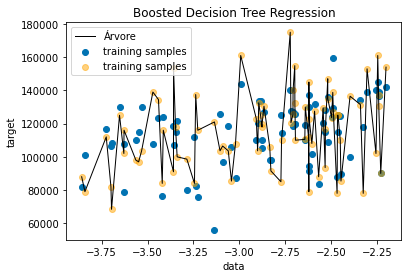

In [338]:
i = 20
f = 100
plt.figure()
plt.scatter(df.X[i:f], df.y_test[i:f], color=colors[0], label="training samples")
plt.scatter(df.X[i:f], df.y_pred_tree[i:f], color='orange', label="training samples", alpha=0.5)
# plt.plot(df.X[i:f], df.y_pred[i:f], color=colors[1], label="regrssão linear", linewidth=1)
plt.plot(df.X[i:f], df.y_pred_tree[i:f], color='black', label="Árvore", linewidth=1)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [339]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [302]:
x = []
for i,v in enumerate(x_test):
    x.append(x_test[i][0])

In [303]:
x

[0.04773312213029587,
 3.715226905134245,
 -0.7314991226029548,
 -0.2710505313760652,
 0.03681831810384101,
 -4.1456763685395375,
 -3.44035615818008,
 0.08201169900414429,
 -1.3061448144420087,
 -3.8413938687703446,
 -3.2260397924741024,
 -4.6818178381269755,
 0.4824087190361531,
 2.3065882356096385,
 5.684855029870333,
 -2.1997666935564797,
 -0.20647911364410163,
 -0.4515538268596885,
 0.9402661925841533,
 2.5184444982707253,
 -2.339237977190242,
 2.6773830118089426,
 4.8777900106286785,
 -2.072043090095941,
 1.277013024591611,
 -2.324109898578207,
 1.835862283452864,
 -4.12884228307355,
 0.5130225852738535,
 -2.772847535629169,
 -2.60421219715794,
 1.4682643420933703,
 4.751255722322318,
 3.953935926327497,
 -1.4140965869454039,
 -0.21545833522256422,
 0.9258954371827769,
 4.137633234391084,
 1.2792910004583617,
 -2.589322379766705,
 -2.8338158632986463,
 1.2779083278197427,
 -3.5323445115820893,
 -1.045517325693158,
 -4.434272234824944,
 -1.4194179841122483,
 -2.0065845434999883,
 -

In [299]:
x_test[2][0]

-0.7314991226029548

In [186]:
plt.figure()
plt.scatter(df_a['1stFlrSF'][i:n], df_a.y_test[i:n], color=c[0], label="training samples")
plt.plot(df_a['1stFlrSF'][i:n], df_a.y_pred_tree[i:n], color=colors[1], label="n_estimators=1", linewidth=0.2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

array([-0.63607833,  2.26875704,  0.74997869, -2.24178219, -1.41614233,
       -1.20121678, -1.6893685 , -0.57441047, -0.97301818, -0.28865283,
        0.73975106, -0.37265436, -0.69510419, -0.79516323, -0.12024172,
       -1.18306346, -0.81996437, -0.24106104, -1.02604084, -0.76162067,
       -1.06246453, -0.21145358, -0.31868327, -0.95122649,  0.64594349,
        1.65030694,  3.62613593, -0.75217584, -0.40252049, -0.3593249 ,
       -0.11633929, -0.27020835, -0.06869175,  1.04145124,  0.620891  ,
        0.13877749])

In [191]:
type(y_test)

pandas.core.series.Series

In [192]:
# df_a[first_important] = X_test[12]
df_a['y_test'] = y_test

In [194]:
df_a.drop('y_test', axis=1, inplace=True)

In [204]:
print(X_test[12].shape)
print(y_pred_tree.shape)
print(y_test.shape)

(36,)
(438,)
(438,)


In [199]:
pd.Series(X_test[12])

0    -0.636078
1     2.268757
2     0.749979
3    -2.241782
4    -1.416142
5    -1.201217
6    -1.689368
7    -0.574410
8    -0.973018
9    -0.288653
10    0.739751
11   -0.372654
12   -0.695104
13   -0.795163
14   -0.120242
15   -1.183063
16   -0.819964
17   -0.241061
18   -1.026041
19   -0.761621
20   -1.062465
21   -0.211454
22   -0.318683
23   -0.951226
24    0.645943
25    1.650307
26    3.626136
27   -0.752176
28   -0.402520
29   -0.359325
30   -0.116339
31   -0.270208
32   -0.068692
33    1.041451
34    0.620891
35    0.138777
dtype: float64